In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamond_dataset.csv')

> ## EDA

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453



     1. carat-->Diamond weight in carat
     2. cut-->Diamond cutting quality from worst to beat(Fair,Good,Very Good,Premium,Ideal)
     3. color-->diamond color from j(worst) to d(best) 
     4. clarity-->Diamond clarity from worst to best(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF) 
     5. depth-->Percentage depth(mean(x,y)) 
     6. table-->the width of widest point 
     7. x--> length in mm  , y-->width in mm , z-->depth in mm  
     8. price-->Diamond price (target variable/dependent variable)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


> ### 11 columns and 193573 rows

In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

> ### no null value in dataset

In [6]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


> ### lets drop id column


In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
 ## check the duplicate values
 df.duplicated().sum()

0

> ### No duplicate values in dataset

> ## separate the numerical and categorical columns

In [14]:

num_col = df.columns[df.dtypes != 'object']
cat_col = df.columns[df.dtypes == 'object']

> ### describe the categorical columns


In [15]:
df[cat_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


> ## visualize the data


<Axes: >

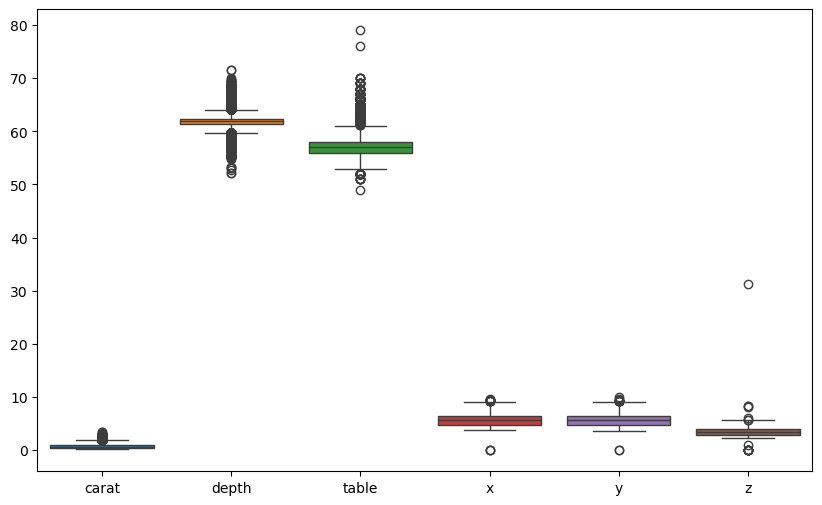

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['carat', 'depth', 'table', 'x', 'y', 'z']])

> ### Handle the outliers 

<Axes: >

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

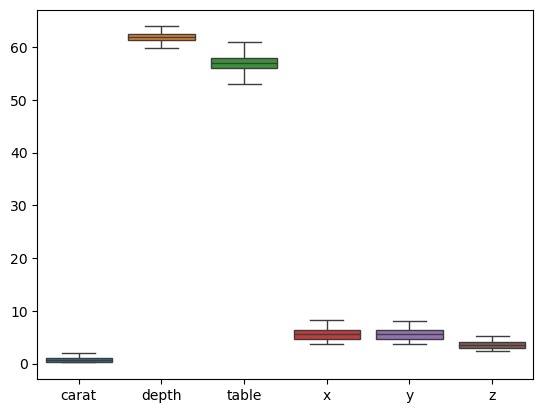

In [18]:
cols=['carat','depth','table','x','y','z']
for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure()
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

sns.boxplot(data=df[['carat', 'depth', 'table', 'x', 'y', 'z']])

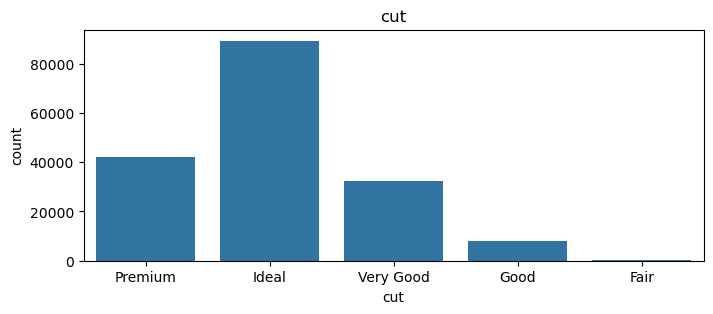

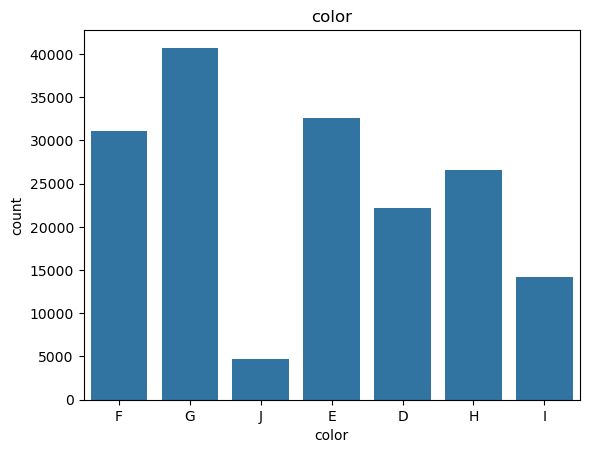

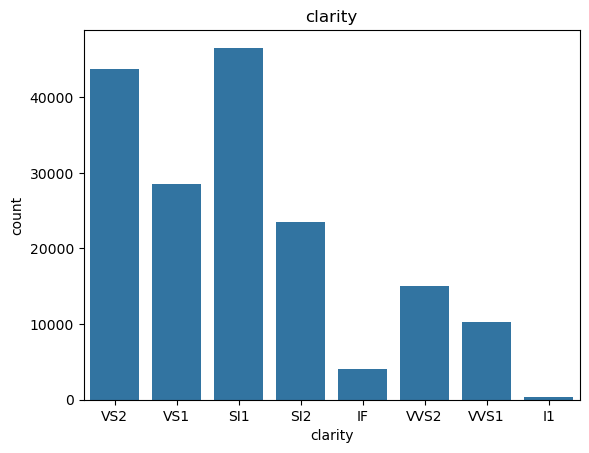

In [20]:
## categorical columns
plt.figure(figsize=(8,3))
x=0
for i in cat_col:
    plt.title(i)
    sns.countplot(data = df , x=i)
    print('\n')
    plt.show()

<Axes: xlabel='carat', ylabel='price'>

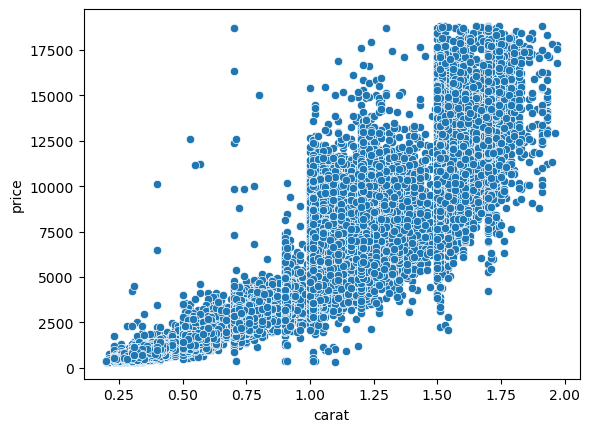

In [21]:
sns.scatterplot(data=df, x='carat', y='price')

> ### Standardize and Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder , StandardScaler

In [23]:
# Define the custom ranking for each ordinal column
cut_cat = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
col_cat = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
calrity_cat = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


# Apply the ordinal encoding
encoder = OrdinalEncoder(categories=[cut_cat, col_cat, calrity_cat])
df[['cut', 'color', 'clarity']] = encoder.fit_transform(df[['cut', 'color', 'clarity']])

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3.0,2.0,3.0,62.2,58.0,7.27,7.33,4.55,13619
2,0.70,4.0,3.0,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,4.0,3.0,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3.0,3.0,3.0,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,2.0,6.0,2.0,62.8,58.0,7.34,7.29,4.59,7506


<Axes: >

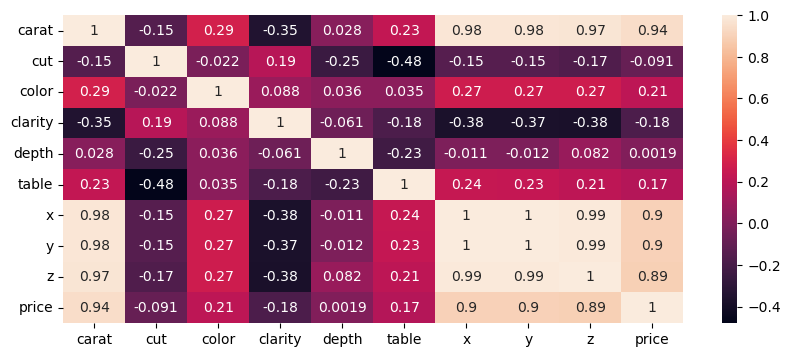

In [40]:
## correlation
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True)

> #### Depth has no correlation with Price So, drop this column
> #### X ,Y , Z has very high correlation with carat so drop this column 

In [26]:
df = df.drop(['depth', 'x', 'y', 'z'], axis=1)

In [27]:
## independent and dependent features
X = df.drop(labels=['price'], axis=1)
y = df[['price']]
y.head()

,price
0,13619
2,2772
3,666
4,14453
5,7506


In [28]:
## train tes split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,carat,cut,color,clarity,table
77232,1.05,3.0,3.0,2.0,58.0
21607,1.00,2.0,2.0,1.0,58.0
99157,0.70,4.0,1.0,4.0,57.0
93246,1.06,4.0,0.0,2.0,56.0
39906,0.54,3.0,3.0,4.0,56.0


In [29]:
## features scaling
import pickle
scaled = StandardScaler()
X_train_scale = scaled.fit_transform(X_train)
X_test_scale = scaled.transform(X_test)
X_train_scale
with open('D:/python/diamonPricePre/models/standard_scaler.pkl', 'wb') as file:
        pickle.dump(scaled, file)

In [30]:
## model trainning
from sklearn.linear_model import LinearRegression, Lasso, Ridge ,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [31]:
def train_models(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'Elastic Regression': ElasticNet(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42)
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        results.append([name ,r2, mse, mae])
        
    with open('D:/python/diamonPricePre/models/RFmodel.pkl', 'wb') as file:
        pickle.dump(model , file)
        
    
    results_df = pd.DataFrame(results, columns=['Model','Acc_test', 'MSE', 'MAE'])
    print(results_df)
    

In [32]:
results = train_models(X_train_scale, y_train, X_test_scale, y_test)
print(results)

                Model  Acc_test           MSE          MAE
0   Linear Regression  0.906758  1.038153e+06   735.493042
1               Lasso  0.906756  1.038168e+06   735.125095
2               Ridge  0.906758  1.038153e+06   735.487165
3  Elastic Regression  0.777845  2.473448e+06  1027.318015
4       Decision Tree  0.969409  3.406026e+05   296.953764
5   Gradient Boosting  0.814672  2.063429e+06  1008.919728
6       Random Forest  0.974533  2.835464e+05   277.244776
None
